In [76]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [91]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines

    undist = cv2.undistort(img,mtx,dist,None,mtx)
    gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)    
    
    #plt.figure(0)
    #plt.imshow(gray,cmap='gray')
    #cv2.drawChessboardCorners(undist, (8,6), corners, ret)

    if True:
        if ret == True:
            plt.figure(0)
            plt.imshow(gray,cmap='gray')
            xmax = 0
            ymax = 0
            for k in range(0,len(corners)):
                x = corners[k][0][0]
                y = corners[k][0][1]
                if x > xmax:
                    xmax = x
                if y > ymax:
                    ymax = y            
                plt.plot(x,y,'ro')
       
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    dst = np.float32([[0,0],[1104,0],[1164,768],[0,768]])
    
    img_size = (gray.shape[1], gray.shape[0])        
    xmax = img_size[0]
    ymax = img_size[1]
    
    offset = 0
    
    p1 = [offset, offset]
    p2 = [xmax-offset, offset]
    p3 = [xmax-offset, ymax-offset]
    p4 = [offset, ymax-offset]
    
    dst = np.float32([p1,p2,p3,p4])
    
    M = cv2.getPerspectiveTransform(src,dst) 
    
    warped = cv2.warpPerspective(undist, M, img_size)

    return warped, M

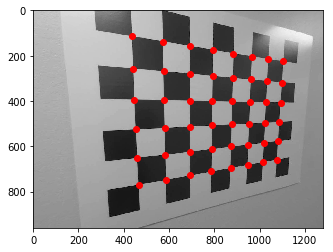

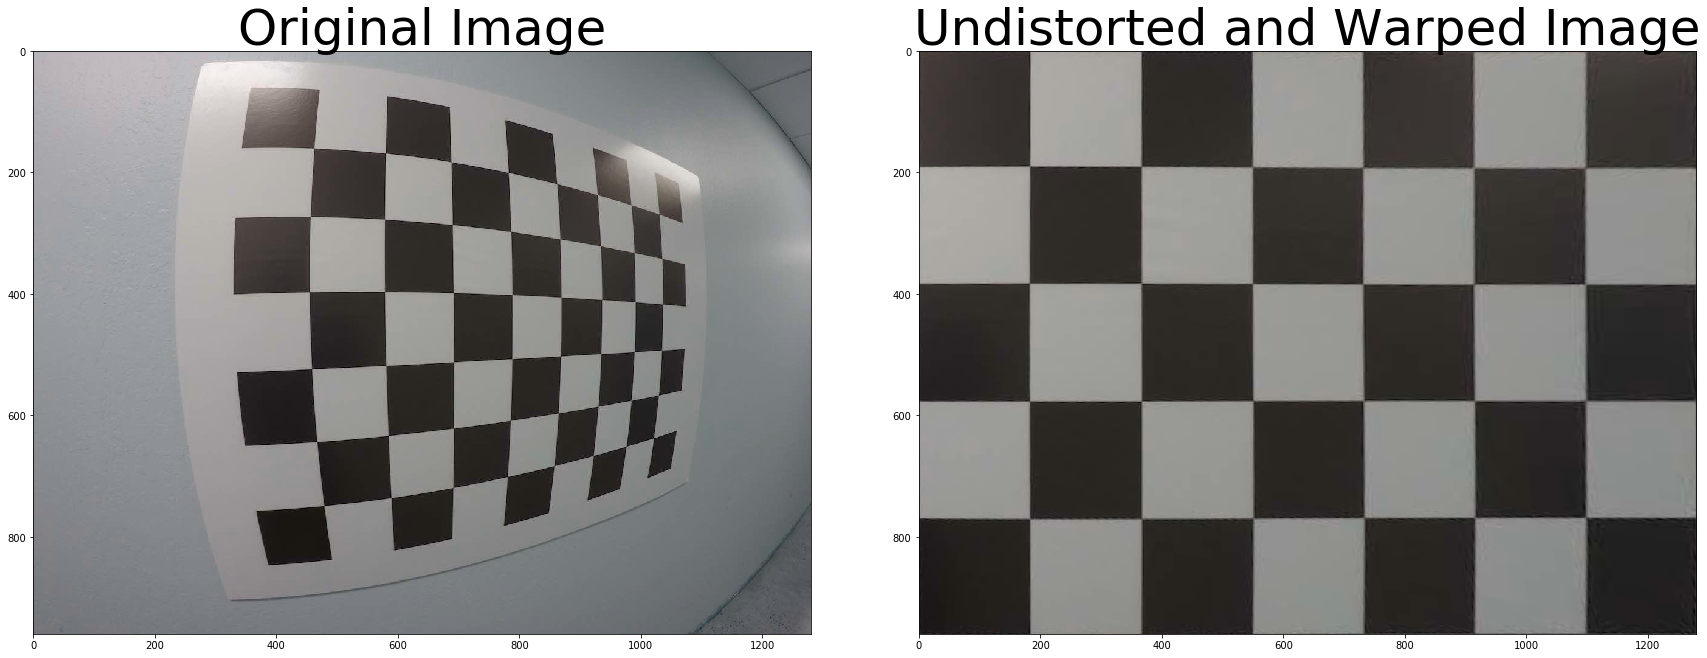

In [92]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
plt.figure(1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)